## """Compute the weighted standard deviation."""

        pre_speeds  post_speeds
count  1677.000000  1680.000000
mean     16.250447    15.587500
std       1.437814     1.211209
min       9.000000    11.000000
25%      15.000000    15.000000
50%      16.000000    16.000000
75%      17.000000    16.000000
max      22.000000    21.000000
Weighted Pre-Treatment Speed: 16.03 mph
Weighted Post-Treatment Speed: 15.08 mph
T-Statistic: 21.650, P-Value: 0.000


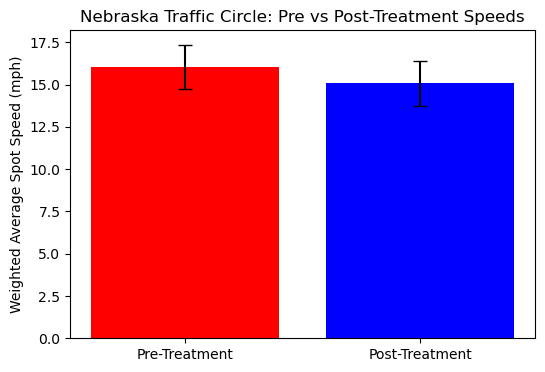

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

pre_treatment = pd.read_csv('data/Nebraska_pre.csv')
post_treatment = pd.read_csv('data/Nebraska_post.csv')
filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
pre_treatment = pre_treatment[~filters]
filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')
post_treatment = post_treatment[~filters]

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

df = pd.DataFrame({'pre_speeds': pre_speeds, 
                   'post_speeds': post_speeds})
summary_table = df.describe()
print(summary_table)


def weighted_std(values, weights):
    
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Nebraska Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

## """Compute the weighted standard error."""

Weighted Pre-Treatment Speed: 16.03 mph
Weighted Post-Treatment Speed: 15.08 mph
T-Statistic: 21.650, P-Value: 0.000


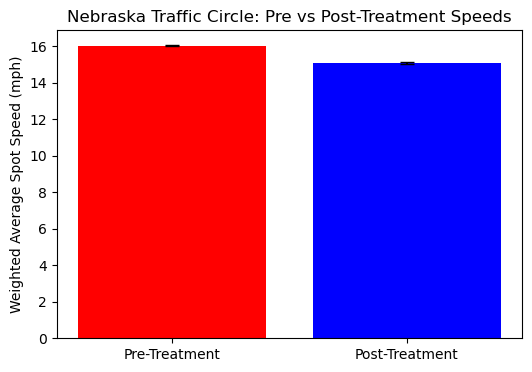

In [2]:
pre_weighted_se = pre_weighted_std / (len(pre_speeds) ** 0.5)
post_weighted_se = post_weighted_std / (len(post_speeds) ** 0.5)


valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (mph)')
plt.title('Nebraska Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

## Droppping 95th Percentiles

Weighted Pre-Treatment Speed: 16.03 mph
Weighted Post-Treatment Speed: 15.08 mph
T-Statistic: 21.650, P-Value: 0.000


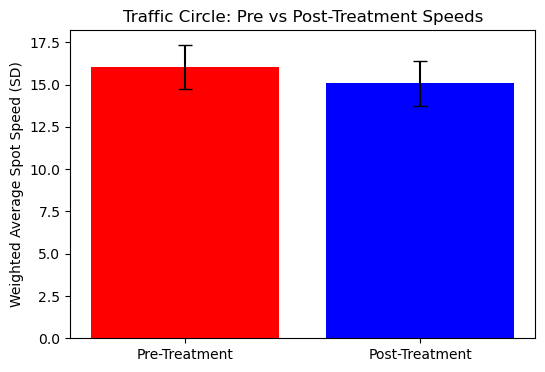

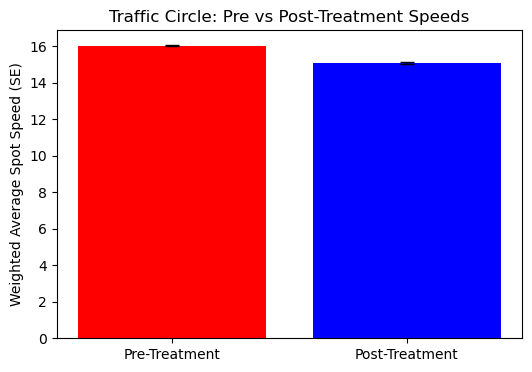

Highest value for pre-treatment'85th Speed Percentile': 44.0 mph Highest value for post-treatment'85th Speed Percentile': 35.0 mph
Row details:
Data Periods                                          Jun 01, 2021 - Jun 01, 2022
Mode of Travel                             All Vehicles - StL All Vehicles Volume
Zone ID                                                                       NaN
Zone Name                                                   North Westgate Avenue
Zone Is Pass-Through                                                          yes
Zone Direction (degrees)                                                      145
Zone is Bi-Direction                                                          yes
Year-Month                                                                2021-09
Day Type                                                      4: Thursday (Th-Th)
Day Part                                                   1: Early AM (12am-6am)
Average Daily Spot Traffic (StL Volu

,Data Periods,Mode of Travel,Zone ID,Zone Name,Zone Is Pass-Through,Zone Direction (degrees),Zone is Bi-Direction,Year-Month,Day Type,Day Part,Average Daily Spot Traffic (StL Volume),Avg Spot Speed (mph),Free Flow Speed (mph),Free Flow Factor,5th Speed Percentile,15th Speed Percentile,85th Speed Percentile,95th Speed Percentile
907,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Nebraska Avenue West,yes,234,yes,2021-12,7: Sunday (Su-Su),1: Early AM (12am-6am),26,18.0,20.360,0.875,3.0,13.0,24.0,45.0
1321,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2021-09,4: Thursday (Th-Th),1: Early AM (12am-6am),21,20.0,24.470,0.825,12.0,12.0,44.0,44.0
1567,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2022-02,5: Friday (F-F),1: Early AM (12am-6am),24,13.0,26.033,0.512,3.0,10.0,18.0,42.0
853,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,Nebraska Avenue West,yes,234,yes,2021-11,6: Saturday (Sa-Sa),1: Early AM (12am-6am),34,18.0,23.765,0.760,3.0,12.0,27.0,40.0
1375,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2021-10,5: Friday (F-F),1: Early AM (12am-6am),27,19.0,26.021,0.735,6.0,10.0,29.0,40.0
1526,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2022-01,6: Saturday (Sa-Sa),2: Peak AM (6am-10am),43,19.0,25.203,0.761,9.0,10.0,32.0,39.0
1286,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2021-08,6: Saturday (Sa-Sa),2: Peak AM (6am-10am),66,18.0,23.876,0.764,6.0,10.0,33.0,38.0
1640,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2022-04,1: Monday (M-M),2: Peak AM (6am-10am),134,17.0,24.321,0.713,7.0,9.0,25.0,38.0
1195,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2021-06,7: Sunday (Su-Su),1: Early AM (12am-6am),33,16.0,26.101,0.603,0.0,6.0,23.0,38.0
1508,"Jun 01, 2021 - Jun 01, 2022",All Vehicles - StL All Vehicles Volume,NaN,North Westgate Avenue,yes,145,yes,2022-01,3: Wednesday (W-W),2: Peak AM (6am-10am),171,19.0,25.203,0.743,7.0,10.0,30.0,38.0


In [3]:
pre_treatment = pd.read_csv('data/Nebraska_pre.csv')
post_treatment = pd.read_csv('data/Nebraska_post.csv')
pre_filters = (pre_treatment['Day Type'] == '0: All Days (M-Su)') | (pre_treatment['Day Part'] == '0: All Day (12am-12am)')
post_filters = (post_treatment['Day Type'] == '0: All Days (M-Su)') | (post_treatment['Day Part'] == '0: All Day (12am-12am)')

pre_treatment = pre_treatment[~pre_filters]
post_treatment = post_treatment[~post_filters]

#def filter_outliers(df, column, threshold=3):
    #valid_values = df[column].dropna()
    #z_scores = stats.zscore(valid_values)
    #valid_indices = valid_values.index[np.abs(z_scores) < threshold]
    #return df.loc[valid_indices]

#pre_treatment_filtered = filter_outliers(pre_treatment, '95th Speed Percentile')
#post_treatment_filtered = filter_outliers(post_treatment, '95th Speed Percentile')

#print("Pre-treatment data size before filtering:", pre_treatment.shape)
#print("Pre-treatment data size after filtering:", pre_treatment_filtered.shape)
#print("Post-treatment data size before filtering:", post_treatment.shape)
#print("Post-treatment data size after filtering:", post_treatment_filtered.shape)

pre_speeds = pre_treatment['Avg Spot Speed (mph)']
post_speeds = post_treatment['Avg Spot Speed (mph)']
pre_volume = pre_treatment['Average Daily Spot Traffic (StL Volume)']
post_volume = post_treatment['Average Daily Spot Traffic (StL Volume)']

pre_weighted_speed = (pre_speeds * pre_volume).sum() / pre_volume.sum()
post_weighted_speed = (post_speeds * post_volume).sum() / post_volume.sum()

def weighted_std(values, weights):
    mean = (values * weights).sum() / weights.sum()
    variance = (weights * (values - mean) ** 2).sum() / weights.sum()
    return variance ** 0.5

pre_weighted_std = weighted_std(pre_speeds, pre_volume)
post_weighted_std = weighted_std(post_speeds, post_volume)
pre_weighted_se = weighted_std(pre_speeds, pre_volume) / (len(pre_speeds) ** 0.5)
post_weighted_se = weighted_std(post_speeds, post_volume) / (len(post_speeds) ** 0.5)

valid_indices = pre_speeds.notna() & post_speeds.notna()
t_stat, p_value = stats.ttest_rel(pre_speeds[valid_indices], post_speeds[valid_indices])

print(f"Weighted Pre-Treatment Speed: {pre_weighted_speed:.2f} mph")
print(f"Weighted Post-Treatment Speed: {post_weighted_speed:.2f} mph")
print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.3f}")

bar_colors = ['red', 'blue']
plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_std, post_weighted_std], capsize=5, color=bar_colors)
plt.ylabel('Weighted Average Spot Speed (SD)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

plt.figure(figsize=(6, 4))
plt.bar(['Pre-Treatment', 'Post-Treatment'], 
        [pre_weighted_speed, post_weighted_speed], 
        yerr=[pre_weighted_se, post_weighted_se], capsize=5, color=bar_colors)

plt.ylabel('Weighted Average Spot Speed (SE)')
plt.title('Traffic Circle: Pre vs Post-Treatment Speeds')
plt.show()

max_85th_speed_row_pre = pre_treatment.loc[pre_treatment['85th Speed Percentile'].idxmax()]
max_85th_speed_row_post = post_treatment.loc[post_treatment['85th Speed Percentile'].idxmax()]

max_85th_speed_value_pre = max_85th_speed_row_pre['85th Speed Percentile']
max_85th_speed_value_post = max_85th_speed_row_post['85th Speed Percentile']

print(f"Highest value for pre-treatment'85th Speed Percentile': {max_85th_speed_value_pre} mph",
     f"Highest value for post-treatment'85th Speed Percentile': {max_85th_speed_value_post} mph")
print("Row details:")
print(max_85th_speed_row_pre,max_85th_speed_row_post )
top_speed = pre_treatment.sort_values('95th Speed Percentile', ascending = False).head(10)
top_speed

In [4]:
pre_weighted_85th_speed = (pre_treatment['85th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_85th_speed = (post_treatment['85th Speed Percentile'] * post_volume).sum() / post_volume.sum()

pre_weighted_95th_speed = (pre_treatment['95th Speed Percentile'] * pre_volume).sum() / pre_volume.sum()
post_weighted_95th_speed = (post_treatment['95th Speed Percentile'] * post_volume).sum() / post_volume.sum()

print(f"Weighted Pre-Treatment 85th Speed Percentile: {pre_weighted_85th_speed:.2f} mph")
print(f"Weighted Post-Treatment 85th Speed Percentile: {post_weighted_85th_speed:.2f} mph")
print(f"Weighted Pre-Treatment 95th Speed Percentile: {pre_weighted_95th_speed:.2f} mph")
print(f"Weighted Post-Treatment 95th Speed Percentile: {post_weighted_95th_speed:.2f} mph")

Weighted Pre-Treatment 85th Speed Percentile: 20.67 mph
Weighted Post-Treatment 85th Speed Percentile: 19.43 mph
Weighted Pre-Treatment 95th Speed Percentile: 24.70 mph
Weighted Post-Treatment 95th Speed Percentile: 23.20 mph


In [5]:
filtered_pre = pre_treatment[pre_treatment['Day Type'] != '0: All Days (M-Su)']
filtered_post = post_treatment[post_treatment['Day Type'] != '0: All Days (M-Su)']

total_pre_volume = filtered_pre['Average Daily Spot Traffic (StL Volume)'].sum()
total_post_volume = filtered_post['Average Daily Spot Traffic (StL Volume)'].sum()

total_combined_volume = total_pre_volume + total_post_volume

print(f"Total Pre-Treatment Volume: {total_pre_volume:,.0f}")
print(f"Total Post-Treatment Volume: {total_post_volume:,.0f}")
print(f"Combined Volume (Pre + Post): {total_combined_volume:,.0f}")


Total Pre-Treatment Volume: 326,345
Total Post-Treatment Volume: 462,382
Combined Volume (Pre + Post): 788,727


In [7]:
results = {
    'Intersection': 'Nebraska Ave & Purdue Ave',
    'Pre_Mean': float(pre_weighted_speed),
    'Post_Mean': float(post_weighted_speed),
    'Pre_Std': float(pre_weighted_std),
    'Post_Std': float(post_weighted_std),
    'Pre_SE': float(pre_weighted_se),
    'Post_SE': float(post_weighted_se),
    'Pre_85th': float(pre_weighted_85th_speed),
    'Post_85th': float(post_weighted_85th_speed),
    'Pre_95th': float(pre_weighted_95th_speed),
    'Post_95th': float(post_weighted_95th_speed),
    'Pre_Max_85th': float(max_85th_speed_value_pre),
    'Post_Max_85th': float(max_85th_speed_value_post),
    'T_Statistic': float(t_stat),
    'P_Value': float(p_value),
    'Pre_Volume': int(total_pre_volume),
    'Post_Volume': int(total_post_volume),
    'Combined Volume': int(total_combined_volume),
    'Pre_Treatment_Volume': int(total_pre_volume),
    'Post_Treatment_Volume': int(total_post_volume),
    'Combined_Volumne': int(total_combined_volume)
}

import json
with open('../results/Nebraska Ave & Purdue Ave_summary.json', 'w') as f:
    json.dump(results, f)